# Portfolio Analysis
Portfolio analysis is an area of investment management that allows investors and fund managers to access and evaluate a collection of investments. In this project, I analyzed five tech stocks and a stock index, particularly I looked at Apple stock, Google stock, Tesla stock, Microsoft  stock, Meta stock, and Nasdaq100 ETF was analyzed. 
The main objective is to compare the statistical metrics of each asset, build an equally weighted stock portfolio and compare its performance to the Nasdaq100 ETF. For the analysis, I used the yfinance library to download data from 2015 to 2022 from yahoo finance. I also used log returns to compute the metrics because it takes into account the compounding effects of returns.

### Computed Metrics
* Expected return - average return that an investor expects to receive from an investment over a specified period of time.
* Volatility - a measure how much the price of an investment flunctuate over time.
* Semi-volatility - a measure of the volatiliy of an investment's return below a certain threshold.
* Correlation - a measure of the relation between the return of two investments.
* Skewness - a measure of the symmetry of the distribution of an investment's return.
* Kurtosis - a measure of the tail of a return distribution.
* Value at risk - a measure of the maximum loss that an investor can expect to incur with a certain level of confidence
* Sharpe Ratio - a measure of the risk-adjusted return of an investment over a period of time
* Maximum Drawdown - the largest percentage decline in the value of an investment over a period of time.
* Alpha and Beta - measures of the risk and return of a stock relative to the market.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy

In [2]:
# tickers = ["AAPL", "MSFT", "GOOG", "TSLA", "META", "QQQ"]
# price_data = yf.download(tickers=tickers, start="2015-01-01", end="2022-12-31")["Adj Close"]
# price_data.columns = price_data.columns.str.lower()

price_data = pd.read_csv("./data/tech_assets.csv", index_col=0, parse_dates=True)
price_data.columns = price_data.columns.str.lower()

In [3]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2015-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aapl    2014 non-null   float64
 1   goog    2014 non-null   float64
 2   meta    2014 non-null   float64
 3   msft    2014 non-null   float64
 4   qqq     2014 non-null   float64
 5   tsla    2014 non-null   float64
dtypes: float64(6)
memory usage: 110.1 KB


In [4]:
price_data.duplicated().sum()

0

In [5]:
price_data.head()

,aapl,goog,meta,msft,qqq,tsla
Date,,,,,,
2015-01-02,24.531767,26.168653,78.449997,40.620663,96.212257,14.620667
2015-01-05,23.840666,25.623152,77.190002,40.247131,94.800949,14.006000
2015-01-06,23.842909,25.029282,76.150002,39.656414,93.529831,14.085333
2015-01-07,24.177237,24.986401,76.150002,40.160255,94.735504,14.063333
2015-01-08,25.106184,25.065184,78.180000,41.341682,96.548744,14.041333


### Price Analysis

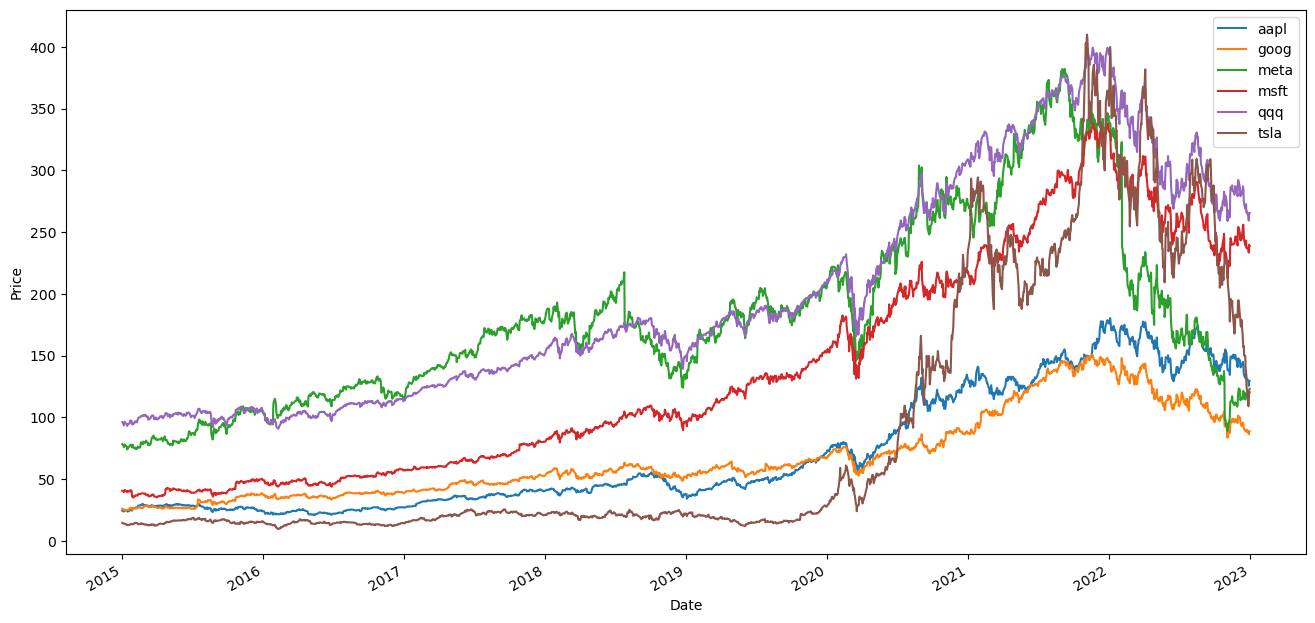

In [6]:
price_data.plot(figsize=(16, 8))
plt.ylabel("Price");

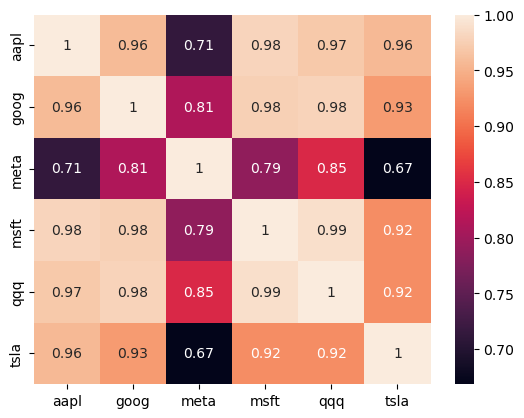

In [7]:
sns.heatmap(price_data.corr(), annot=True);

In [8]:
price_data.describe()

,aapl,goog,meta,msft,qqq,tsla
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
mean,71.186381,67.901388,181.474027,138.037783,198.836738,88.662189
std,49.360802,34.276966,73.217862,89.215553,89.420935,108.557913
min,20.854183,24.560070,74.050003,35.095699,90.936409,9.578000
25%,29.321243,39.901001,124.912500,57.472189,115.015409,16.217167
50%,46.235252,56.965250,171.250000,104.797512,172.797432,21.881333
75%,122.063551,88.430124,210.162495,217.467361,280.093216,182.904999
max,180.434280,150.709000,382.179993,338.335938,399.361328,409.970001


## Return Analysis

In [9]:
returns = price_data.pct_change().fillna(0).apply(np.log1p)
returns.head()

,aapl,goog,meta,msft,qqq,tsla
Date,,,,,,
2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.028576,-0.021066,-0.016191,-0.009238,-0.014777,-0.042950
2015-01-06,0.000094,-0.023450,-0.013565,-0.014786,-0.013499,0.005648
2015-01-07,0.013925,-0.001715,0.000000,0.012625,0.012808,-0.001563
2015-01-08,0.037703,0.003148,0.026309,0.028993,0.018959,-0.001566


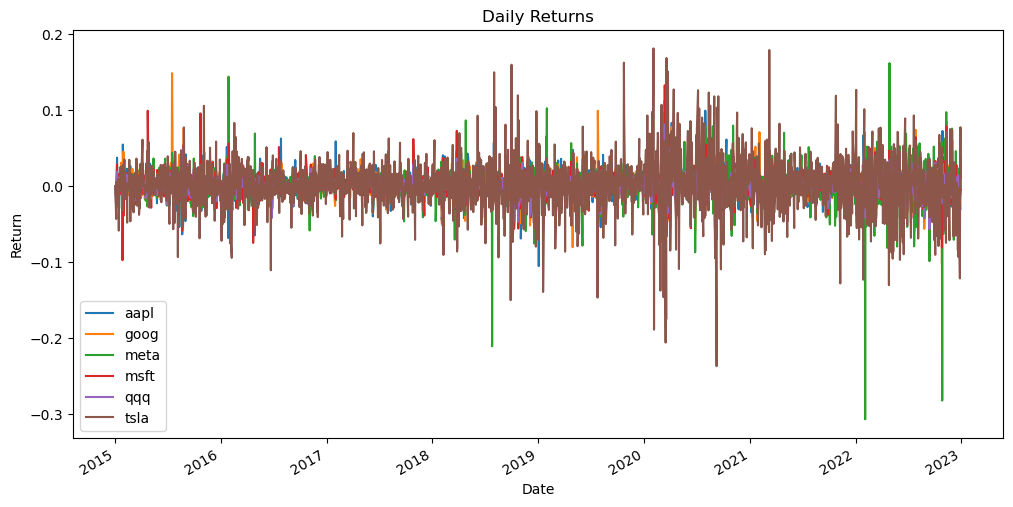

In [10]:
returns.plot(figsize=(12, 6))
plt.ylabel("Return")
plt.title("Daily Returns");

Tesla stocks appears to be the most volatile asset between from 2015 to 2022.

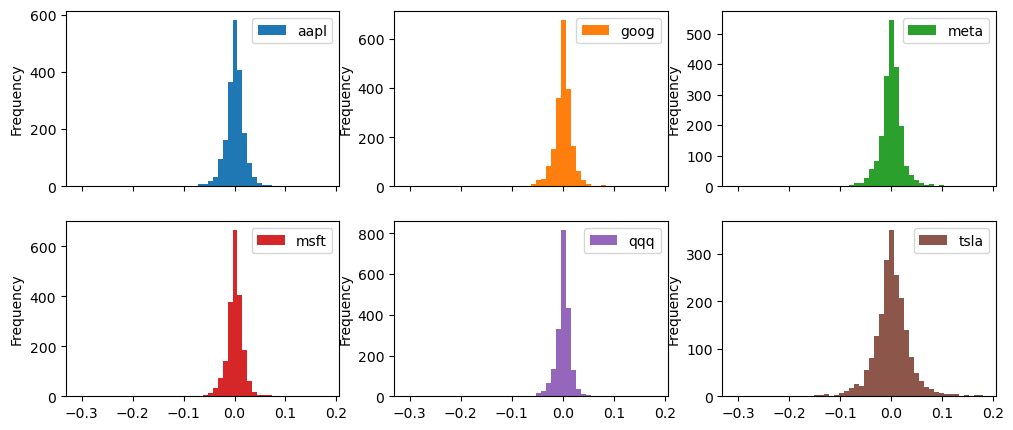

In [11]:
# plot distribution of returns
returns.plot(kind="hist", subplots=True, layout=(2, 3), figsize=(12, 5), bins=50);

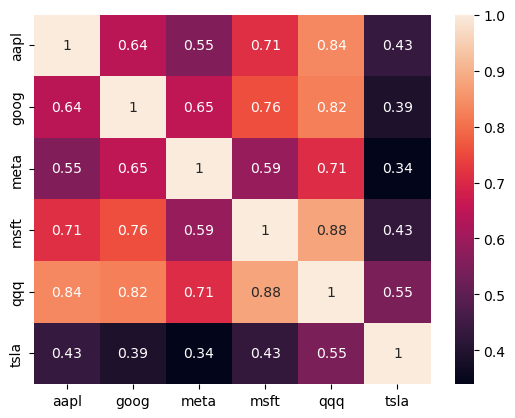

In [12]:
# plot correlation matrix of returns
sns.heatmap(returns.corr(), annot=True);

### Expected return and annualized return

In [13]:
# compute average daily return and annual return
avg_returns = returns.mean().sort_values(ascending=False)
ann_returns = avg_returns.mul(252).apply(np.exp).sub(1).sort_values(ascending=False)
display(
    "Expected Daily Return",
    avg_returns.mul(100),
    "Annualized Return",
    ann_returns.mul(100)
)

'Expected Daily Return'

tsla    0.105820
msft    0.087931
aapl    0.082628
goog    0.060627
qqq     0.050401
meta    0.021244
dtype: float64

'Annualized Return'

tsla    30.560414
msft    24.805414
aapl    23.148585
goog    16.506986
qqq     13.542865
meta     5.499451
dtype: float64

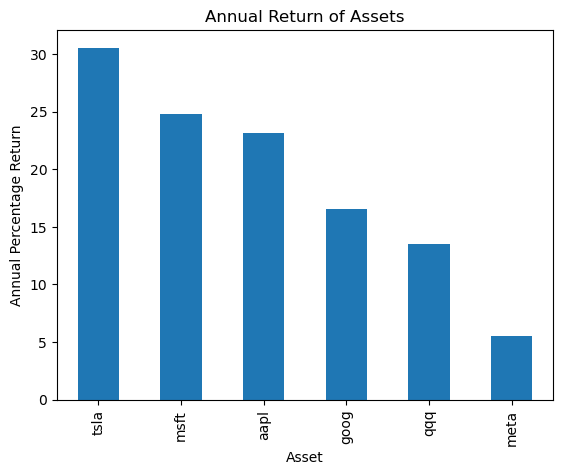

In [14]:
ann_returns.mul(100).plot(kind="bar")
plt.title("Annual Return of Assets")
plt.xlabel("Asset")
plt.ylabel("Annual Percentage Return");

In [15]:
# computing cumulative returns
cum_returns = returns.cumsum().apply(np.exp).sub(1)
cum_returns.tail()

,aapl,goog,meta,msft,qqq,tsla
Date,,,,,,
2022-12-23,4.359464,2.431969,0.504653,4.849587,1.770760,7.423008
2022-12-27,4.285083,2.360127,0.489866,4.806217,1.731586,6.462040
2022-12-28,4.122909,2.303953,0.473805,4.746675,1.695522,6.708950
2022-12-29,4.268013,2.399105,0.532951,4.905454,1.761225,7.332041
2022-12-30,4.281019,2.390698,0.533971,4.876296,1.759567,7.425060


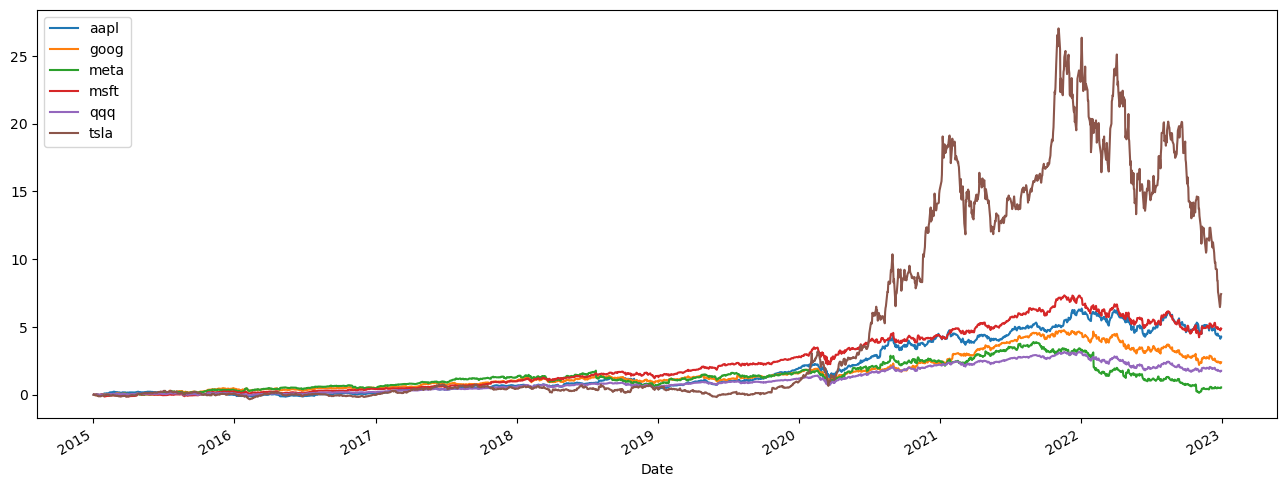

In [16]:
cum_returns.plot(figsize=(16, 6));

### Volatitily, Annualized Volatility, and Semi-volatility

In [17]:
# compute daily volatility and annual volatility
volatility = returns.std().sort_values() # standard deviation of returns
ann_volatility = volatility.sort_values() * 252**0.5 # volatility * 252**0.5
display(
    "Volatility",
    volatility.mul(100),
    "Annualized Volatility",
    ann_volatility.mul(100)
)

'Volatility'

qqq     1.432910
msft    1.772441
goog    1.780140
aapl    1.886912
meta    2.394912
tsla    3.568987
dtype: float64

'Annualized Volatility'

qqq     22.746744
msft    28.136624
goog    28.258840
aapl    29.953802
meta    38.018044
tsla    56.655910
dtype: float64

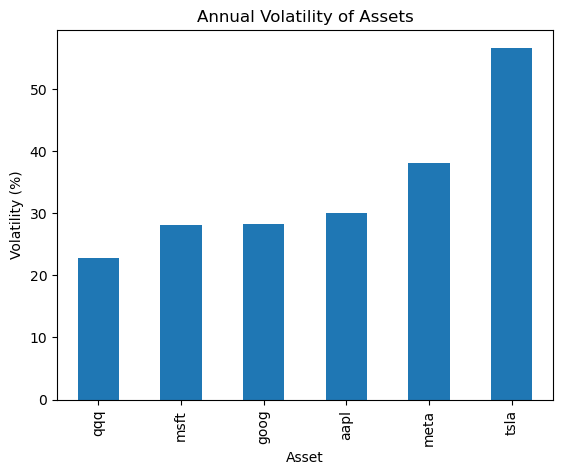

In [18]:
ann_volatility.mul(100).plot(kind="bar")
plt.title("Annual Volatility of Assets")
plt.xlabel("Asset")
plt.ylabel("Volatility (%)");

In [19]:
def semi_volatility(returns: pd.Series) -> float:
    """
    Calculates the standard deviation of all the observations that fall below an asset's mean return
    """
    excess_ret = returns - returns.mean()
    neg_excess_ret = excess_ret[excess_ret < 0]
    n_neg_excess_ret = neg_excess_ret.shape[0]
    semi_deviation = (neg_excess_ret.pow(2).sum()/n_neg_excess_ret) ** 0.5
    
    return semi_deviation

In [20]:
# compute semi-deviation of returns
semi_volatility = returns.apply(semi_volatility).sort_values()
semi_volatility * 100

qqq     1.560976
msft    1.796064
goog    1.811821
aapl    1.923673
meta    2.646661
tsla    3.609593
dtype: float64

### Skewness and Kurtosis

In [21]:
# compute skewness of return distribution
returns.skew()

aapl   -0.219428
goog    0.123705
meta   -2.092317
msft   -0.183691
qqq    -0.576811
tsla   -0.161237
dtype: float64

In [22]:
# compute kurtosis of returns distribution
returns.kurtosis().sort_values(ascending=False)

meta    28.889217
msft     8.464089
qqq      7.174258
goog     6.694138
aapl     5.247819
tsla     4.829668
dtype: float64

### Value at Risk

In [23]:
def get_var(returns: pd.Series|pd.DataFrame, method: str = "g", level: int = 0.05, modified: bool = False):
    """
    Calculates Value at Risk (VaR) of an asset at a given level of confidence.
    Calculates guassian VaR by default
    
    Parameters
    ----------
    returns: pd.Series or pd.DataFrame of asset returns
    method: str
        if h, calculate VaR using historical method
        if g, calculate VaR using gaussian method 
    level: confidence level of estimates
    modified: bool
        if True, calculate modified gaussian VaR using Cornish-Fisher expansion
    """
    if method=="h":
       return -returns.quantile(level)
    
    if method=="g": 
        z = scipy.stats.norm.ppf(level)
        if modified:
            s = returns.skew()
            k = returns.kurtosis()+3
            z = (
                    z 
                    + (z**2 - 1)*s/6 
                    + (z**3 - 3*z)*(k-3)/24 
                    - (2*z**3 - 5*z)*(s**2)/36
                )
        return -(returns.mean() + z*returns.std())
    else:
        raise ValueError(f"Unknown method {method}")
    

In [24]:
# get VaR at 95% confidence level
var = returns.apply(get_var, modified=True).sort_values()
var * 100

qqq     2.325056
goog    2.563849
msft    2.616147
aapl    2.937222
meta    3.749250
tsla    5.578619
dtype: float64

In [25]:
def get_cvar(returns, method="g", level=0.05, modified=False):
    """
    Calculates the conditional value at risk by taking the average of the negative returns below VaR
    """
    if isinstance(returns, pd.Series):
        return -returns.loc[returns.lt(-get_var(returns, method=method, level=level, modified=modified))].mean()
    elif isinstance(returns, pd.DataFrame):
        return returns.apply(get_cvar, modified=modified, level=level, axis=0)
    else:
        raise TypeError("returns should be a Series or DataFrame")
    

In [26]:
cvar = get_cvar(returns, modified=True).sort_values()
cvar * 100

qqq     3.491283
goog    3.910318
msft    3.946734
aapl    4.419843
meta    5.955102
tsla    8.685460
dtype: float64

### Sharpe Ratio

In [27]:
def sharpe_ratio(returns, rf=0.0, annualize=True):
    excess_ret = returns.mean() - rf/252
    std = returns.std()
    sr = excess_ret/std
    
    if annualize:
        return sr * 252**0.5
    return sr

In [28]:
sr = returns.apply(sharpe_ratio, rf=0.01).sort_values(ascending=False)
sr

msft    0.751994
aapl    0.661757
qqq     0.514404
goog    0.505262
tsla    0.453026
meta    0.114513
dtype: float64

### Drawdown

In [29]:
def get_drawdowns(returns):
    cum_ret = returns.cumsum().apply(np.exp)
    peaks = cum_ret.cummax()
    dd = cum_ret.div(peaks).sub(1)
    
    return dd

def get_max_drawdown_duration(drawdowns):
    dd_duration = np.zeros(drawdowns.shape[0])
    for i in range(len(dd_duration)):
        if drawdowns[i] != 0:
            dd_duration[i] = dd_duration[i-1] + 1

    return dd_duration.max()

In [30]:
drawdowns = returns.apply(get_drawdowns)

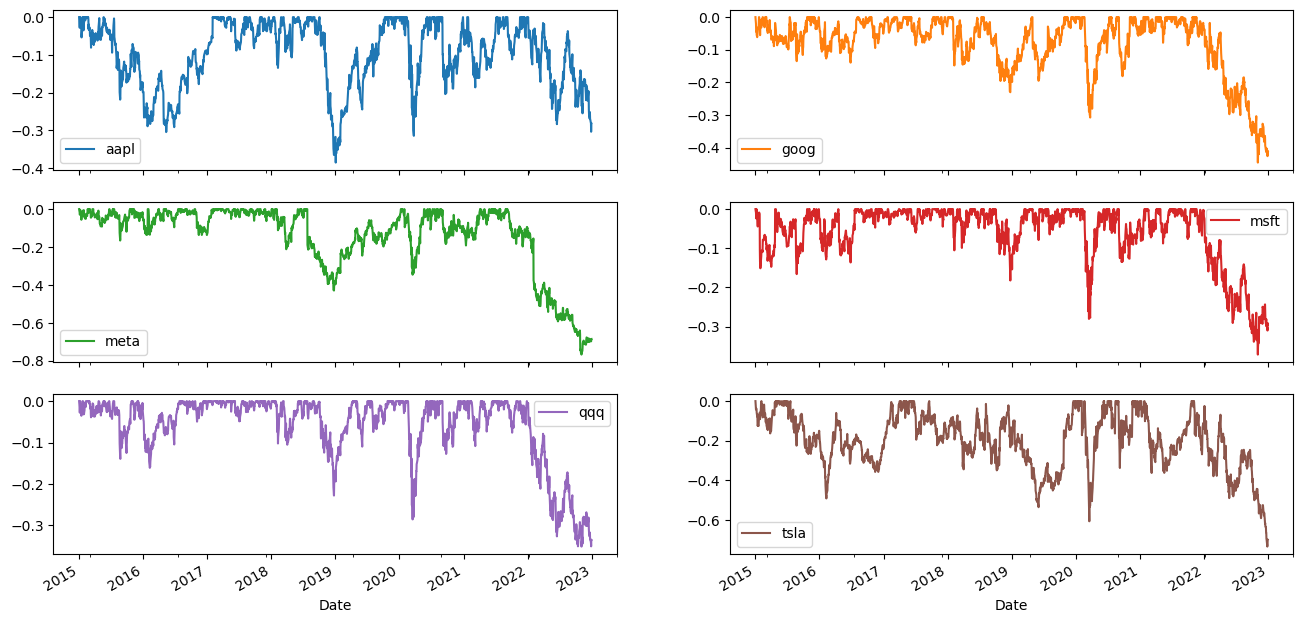

In [31]:
drawdowns.plot(figsize=(16, 8), subplots=True, layout=((3, 2)));

In [32]:
max_dd = drawdowns.min().sort_values() # maximum drawsdowns
max_dd * 100

meta   -76.736092
tsla   -73.388297
goog   -44.601850
aapl   -38.515914
msft   -37.148485
qqq    -35.118718
dtype: float64

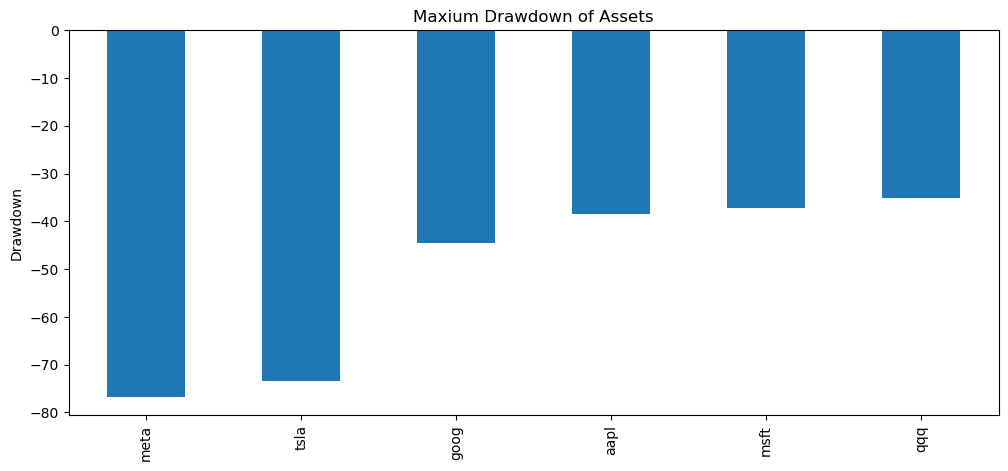

In [33]:
max_dd.mul(100).plot(kind="bar", figsize=(12, 5), title="Maxium Drawdown of Assets", ylabel="Drawdown");

In [34]:
longest_dd_duration = drawdowns.apply(get_max_drawdown_duration).sort_values()
longest_dd_duration

qqq     255.0
msft    279.0
goog    280.0
meta    366.0
aapl    426.0
tsla    566.0
dtype: float64

### Alpha and Beta

In [35]:
def get_alpha_beta(returns, benchmark, annualize=True):
    """
    Calculates alpha and beta using linear regression
    """
    alpha, beta  = np.polyfit(benchmark, returns, deg=1)[::-1]
    if annualize:
        alpha = np.exp(alpha*252)-1
    return alpha, beta

In [36]:
# compute alpha and beta of assets
benchmark = "qqq"
alpha_beta_df = pd.DataFrame(index=returns.columns, columns=["alpha", "beta"])

for ticker in returns.columns:
    alpha_beta_df.loc[ticker, :] = get_alpha_beta(returns[ticker], returns[benchmark])

In [37]:
alpha_beta_df

,alpha,beta
aapl,0.070681,1.101698
goog,0.023002,1.023855
meta,-0.092198,1.183092
msft,0.086953,1.088162
qqq,0.0,1.0
tsla,0.097863,1.364461


## Asset allocation
Evaluating an equal weight stock portfolio

In [38]:
tickers = [col for col in price_data.columns if col!=benchmark]
cash = 1000

In [39]:
weights = np.ones(len(tickers))/len(tickers)
ticker_ret = returns[tickers].copy()

In [40]:
daily_port_val = ticker_ret.cumsum().apply(np.exp).mul(weights).mul(cash).sum(axis=1)
daily_port_ret = daily_port_val.pct_change().apply(np.log1p).fillna(0)

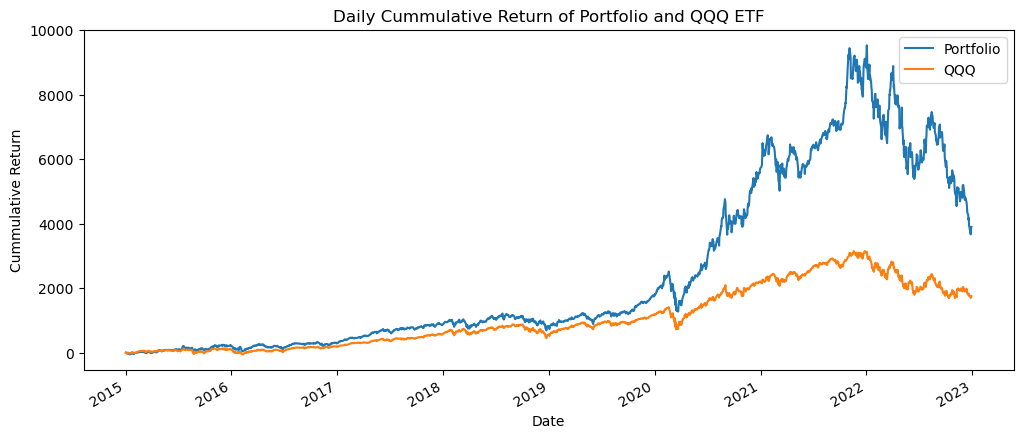

In [41]:
daily_port_val.sub(cash).plot(figsize=(12, 5), label="Portfolio")
cum_returns.qqq.mul(cash).plot(label="QQQ")
plt.title("Daily Cummulative Return of Portfolio and QQQ ETF")
plt.ylabel("Cummulative Return")
plt.legend();

In [42]:
# compare gross return
daily_port_val[-1], (1+cum_returns.qqq[-1])*cash

(4901.408603152976, 2759.567425620702)

In [43]:
# compare annual returns
avg_port_ret = daily_port_ret.mean()
np.expm1(avg_port_ret*252)*100, ann_returns.qqq*100

(22.004487199749367, 13.542864953710843)

In [44]:
# compare annual volatility
(daily_port_ret.std() * 252**0.5)*100, ann_volatility.qqq*100

(30.698523358404245, 22.74674440546895)

In [45]:
# compare sharpe ratio
sharpe_ratio(daily_port_ret, rf=0.01), sr.qqq

(0.6152987757402634, 0.5144043575670588)

In [46]:
# compare portfolio drawdown to market drawdown
get_drawdowns(daily_port_ret).min()*100, max_dd.qqq*100

(-55.675652987542904, -35.11871830266087)

In [47]:
# compare portfolio drawdown duration to market drawdown duration
get_max_drawdown_duration(get_drawdowns(daily_port_ret)), longest_dd_duration.qqq

(250.0, 255.0)

In [48]:
# compare cvar
get_cvar(daily_port_ret, modified=True)*100, cvar.qqq*100

(4.779456381938286, 3.4912832590361154)

# Key Takeaways

* Tesla stock had the highest return among individual assets, however it was also the most volatile asset in  period
* Microsoft stock had the highest sharpe ratio
* Most of the stocks were down in 2022, Meta stock had the highest drawdown of about 77%.
* Tesla Stock had the longest drawdown period of 566 days.
* The equal weight porfolio had a gross return of about 490%, however it was more volatile when compared to the market index.